## Template Matching

### Template Matching in OpenCV


(-125685.0078125, 138253.5, (84, 152), (158, 202))


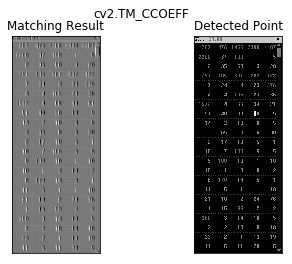

(-1.0, 1.0, (48, 5), (99, 27))


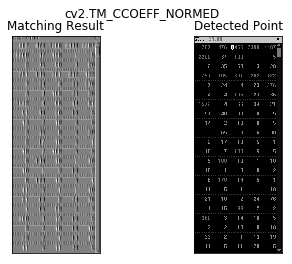

(16169.947265625, 462000.03125, (76, 39), (169, 0))


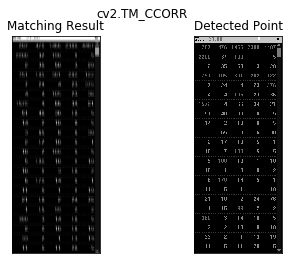

(0.058520521968603134, 0.9989787936210632, (203, 500), (158, 202))


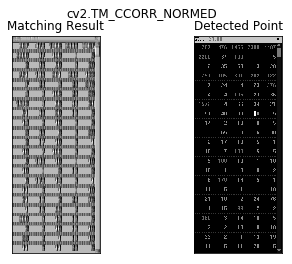

(881.96875, 923182.0, (99, 27), (215, 5))


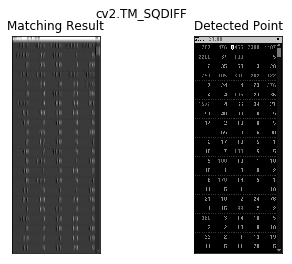

(0.0036296413745731115, 1.0, (99, 27), (0, 0))


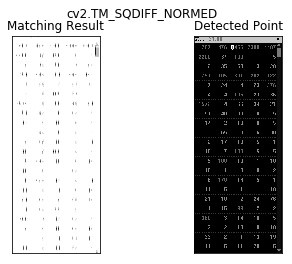

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/stock.png', 0)
img2 = img.copy()
template = cv2.imread('./images/templates/1.png', 0)
template.shape
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(cv2.minMaxLoc(res))
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

### Template Matching with Multiple Objects

### the raw image is here

![stock.png](./images/stock.png)

### by the following code, we can get the content

In [1]:
import os
import cv2
import numpy as np
import collections

img_rgb = cv2.imread('./images/stock.png')
result = []
def detect(img_rgb):
    def group(ls: list):
        s = ''
        for index, value in enumerate(ls):
            if index < len(ls)-1 and ls[index+1][0] - value[0] < 10:
                s += value[1]
            else:
                s += value[1]
                result.append(s)
                s = ''
    path = './images/templates'
    res = collections.defaultdict(list)

    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

    for name in os.listdir(path):
        if not name.endswith('.png'):
            continue
        template = cv2.imread(os.path.join(path, name), 0)
        temp = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(temp>=0.98)
        num = name.split('.')[0]
        for i in zip(*loc):
            res[i[0]].append((i[1], num))
    # sort
    res = sorted(res.items())
    [r[1].sort()for r in res]

    [group(r[1]) for r in res]

detect(img_rgb)

for i in range(0, len(result), 5):
    print(result[i: i+5])


['207', '476', '1466', '2380', '4487']
['2200', '37', '190', '1', '5']
['2', '35', '50', '3', '20']
['751', '105', '301', '282', '122']
['7', '24', '4', '23', '376']
['4', '4', '105', '23', '36']
['1572', '4', '66', '34', '21']
['51', '40', '30', '10', '5']
['14', '2', '10', '8', '5']
['3', '65', '8', '6', '30']
['2', '17', '10', '5', '1']
['10', '7', '100', '5', '5']
['5', '100', '10', '1', '10']
['10', '1', '3', '10', '2']
['6', '170', '14', '5', '1']
['11', '5', '1', '1', '10']
['21', '10', '2', '24', '76']
['1', '15', '99', '2', '2']
['380', '3', '14', '10', '5']
['2', '2', '10', '10', '10']
['33', '2', '1', '13', '19']
['11', '5', '11', '20', '5']


# Image Thresholding

### Simple Thresholding

#### cv.threshold()
If pixel value is greater than a threshold value, it is assigned one value(may be white), else it is assigned another value(may be black).

params:
  - First argument is the source Image, which **should be a grayscale image**
  - Second argument is the threshold value which is used to classify the pixle values
  - Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshod value
  - Fourth argument set different styles of thresholding
    - cv2.THRESH_BINARY
    - cv2.THRESH_BINARY_INV
    - cv2.THRESH_TRUNC
    - cv2.THRESH_TOZERO
    - cv2.THRESH_TOZERO_INV
return:
  - First on is **retval**
  - Second output is our **threshold image**

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# for i in range(6):
#     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])

# plt.show()

the result is given below:
![threshold](./images/threshold.jpg)

### Adaptive Thresholding

#### adaptiveThreshold()
params:
  - Adaptive Method - It decides how thresholding value is calculated.
    - cv2.ADAPTIVE_THRESH_MEAN_C: threshold value is the mean of neightbourhood area.
    - cv2.ADAPTIVE_THRESH_GAUSSIAN_C: threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
  - Block Size - It decides the size of neightbourhood area.
  - C - It is just a constant which is substracted from the mean or weighted mean calculated.